# Model Performace Evaluation and Interpretation

we will choose the best model among 5 Models based on the performance metrics. 
1) Logistic Regression
2) K-Nearest Neighbours
3) Decision Tree
4) Support vector machine
5) Neural network (MLP)

In [1]:
# importing Libraries
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report
import scikitplot as skplt
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# load data
data=pd.read_csv('online_shoppers_intention.csv')

In [3]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
data.Weekend = data.Weekend.map(lambda x: 0 if x is False else 1)
data.Revenue = data.Revenue.map(lambda x: 0 if x is False else 1)

In [5]:
data.Month.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [6]:
months = {
    'Feb': 2,
    'Mar': 3,
    'May': 5,
    'June': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

data['Month'] = data['Month'].map(months)

In [7]:
data.VisitorType.value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [8]:
# create columns for categorical values of column Visitortype
x1 = pd.get_dummies(data.VisitorType)
data = pd.concat([data,x1],axis=1)

In [9]:
# drop redundant columns 
data.drop(['VisitorType','Other'],axis=1,inplace=True)

In [10]:
data = data[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'New_Visitor', 'Returning_Visitor','Revenue']]

In [11]:
# Data Standardization
Scaler = StandardScaler()
scaled_x = Scaler.fit_transform(data.drop(columns=['Revenue']))

In [12]:
data1 = pd.DataFrame(scaled_x,columns=data.columns[:-1])
data1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,New_Visitor,Returning_Visitor
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.665924,-1.233426,-0.790293,-0.894178,-0.762629,-0.550552,-0.399087,0.410621
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-1.665924,-0.136078,-0.207952,-0.894178,-0.514182,-0.550552,-0.399087,0.410621
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.665924,2.058618,-0.790293,2.437081,-0.265735,-0.550552,-0.399087,0.410621
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,-1.665924,0.961270,-0.207952,-0.477771,-0.017289,-0.550552,-0.399087,0.410621
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,-1.665924,0.961270,0.374389,-0.894178,-0.017289,1.816360,-0.399087,0.410621


In [13]:
# assigning predictor variables and target into x and y
X = data1
y = data[['Revenue']]

#### Here we have imbalanced dataset, so performed oversampling

In [14]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Perform oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

In [15]:
# split data into train test validation set
X_train,X_temp,y_train,y_temp = train_test_split(X_resampled,y_resampled,test_size=0.22,random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)

In [16]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (16258, 18)
X_val shape: (2293, 18)
X_test shape: (2293, 18)
y_train shape: (16258, 1)
y_val shape: (2293, 1)
y_test shape: (2293, 1)


### Logistic Regression

In [17]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [18]:
y_pred = model.predict(X_val)
Lr_accuracy = accuracy_score(y_val,y_pred)
print(f'The Accuracy of the model using Logistic Regression is: {round(Lr_accuracy,3)}')

The Accuracy of the model using Logistic Regression is: 0.825


In [19]:
classification = classification_report(y_val,y_pred)
print(f'The Classification report of the model using Logistic Regression is:\n {classification}')

The Classification report of the model using Logistic Regression is:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84      1148
           1       0.87      0.76      0.81      1145

    accuracy                           0.83      2293
   macro avg       0.83      0.83      0.82      2293
weighted avg       0.83      0.83      0.82      2293



(0.0, 1.1)

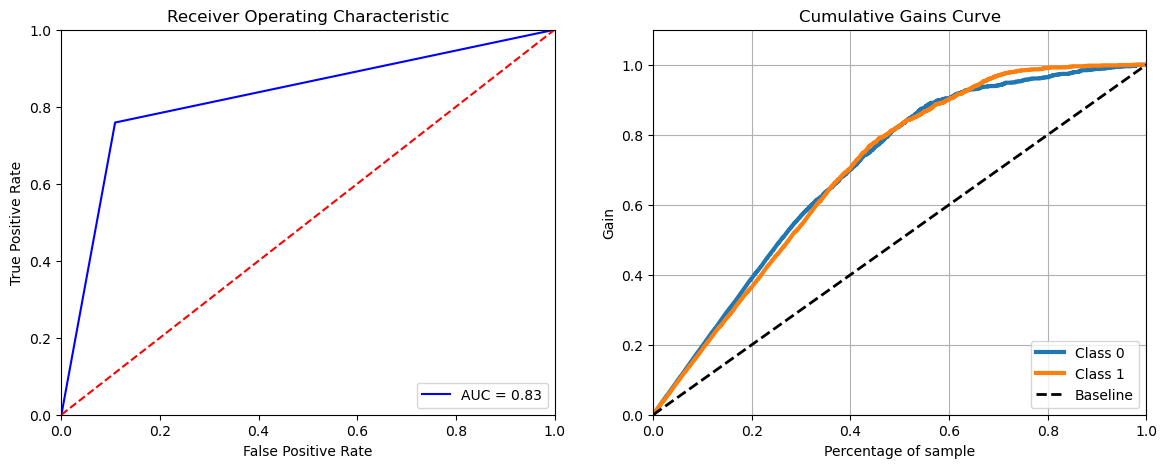

In [20]:
# Calculating ROC 
fpr, tpr, threshold = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharex=False)
ax1.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Receiver Operating Characteristic')
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')
ax1.legend(loc = 'lower right')
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
 
skplt.metrics.plot_cumulative_gain(y_val,model.predict_proba(X_val), ax=ax2)
ax2.set_ylim([0, 1.1])

### K-Nearest Neighbours (KNN)

In [21]:
for k in range(1,5):
    print(f'Testing for {k} neighbour..')
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_val)
    
    # Accuracy
    accuracy = accuracy_score(y_val,y_pred)
    print(f'The Accuracy for {k} neighbours is: {round(accuracy,2)}\n')

Testing for 1 neighbour..
The Accuracy for 1 neighbours is: 0.91

Testing for 2 neighbour..
The Accuracy for 2 neighbours is: 0.92

Testing for 3 neighbour..
The Accuracy for 3 neighbours is: 0.89

Testing for 4 neighbour..
The Accuracy for 4 neighbours is: 0.89



In [22]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [23]:
y_pred = model.predict(X_val)
Knn_accuracy = accuracy_score(y_val,y_pred)
print(f'The Accuracy of the model using K-Nearest Neighbor is: {round(Knn_accuracy,3)}')

The Accuracy of the model using K-Nearest Neighbor is: 0.919


In [24]:
classification = classification_report(y_val,y_pred)
print(f'The Classification report of the model using K-Nearest Neighbor is:\n {classification}')

The Classification report of the model using K-Nearest Neighbor is:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92      1148
           1       0.89      0.96      0.92      1145

    accuracy                           0.92      2293
   macro avg       0.92      0.92      0.92      2293
weighted avg       0.92      0.92      0.92      2293



(0.0, 1.1)

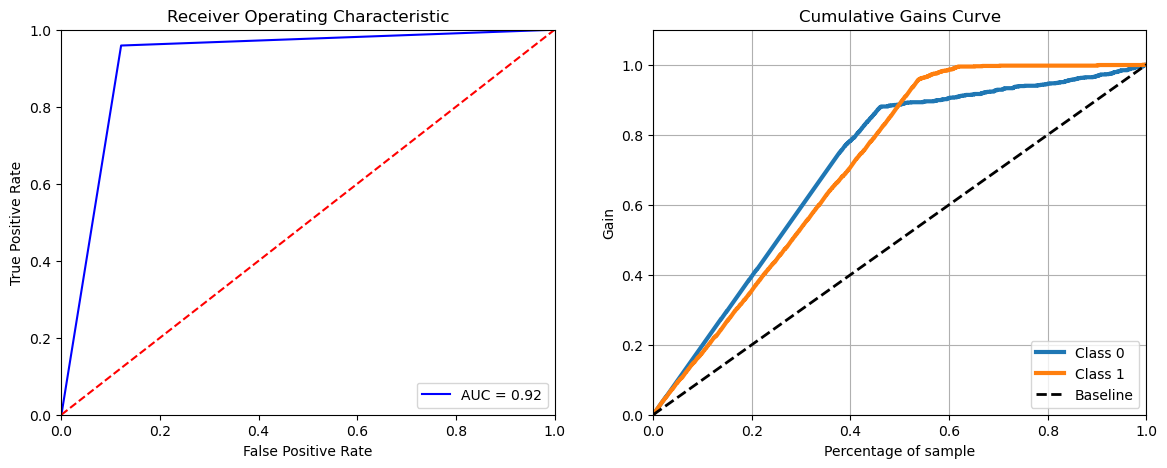

In [25]:
# Calculating ROC 
fpr, tpr, threshold = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharex=False)
ax1.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Receiver Operating Characteristic')
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')
ax1.legend(loc = 'lower right')
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
 
skplt.metrics.plot_cumulative_gain(y_val,model.predict_proba(X_val), ax=ax2)
ax2.set_ylim([0, 1.1])

### Decision Tree

In [26]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
y_pred = model.predict(X_val)
Dt_accuracy = accuracy_score(y_val,y_pred)
print(f'The Accuracy of the model using Decision Tree is: {round(Dt_accuracy,3)}')

The Accuracy of the model using Decision Tree is: 0.899


In [28]:
classification = classification_report(y_val,y_pred)
print(f'The Classification report of the model using Decision Tree is:\n {classification}')

The Classification report of the model using Decision Tree is:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1148
           1       0.90      0.90      0.90      1145

    accuracy                           0.90      2293
   macro avg       0.90      0.90      0.90      2293
weighted avg       0.90      0.90      0.90      2293



(0.0, 1.1)

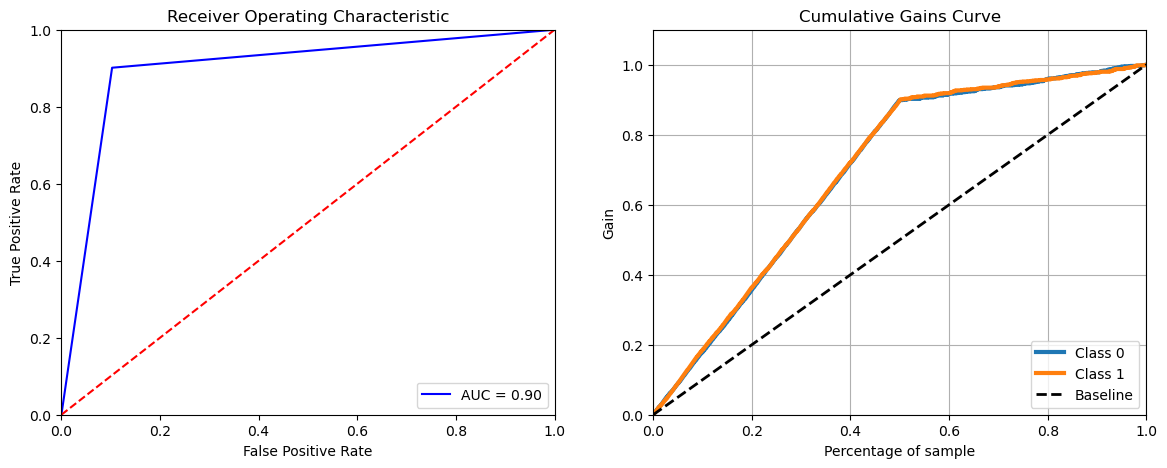

In [29]:
# Calculating ROC 
fpr, tpr, threshold = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharex=False)
ax1.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Receiver Operating Characteristic')
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')
ax1.legend(loc = 'lower right')
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
 
skplt.metrics.plot_cumulative_gain(y_val,model.predict_proba(X_val), ax=ax2)
ax2.set_ylim([0, 1.1])

### Support Vector Machine 

In [30]:
model = SVC(probability=True)
model.fit(X_train,y_train)

SVC(probability=True)

In [31]:
y_pred = model.predict(X_val)
SVC_accuracy = accuracy_score(y_val,y_pred)
print(f'The Accuracy of the model using Support Vector Machine is: {round(SVC_accuracy,3)}')

The Accuracy of the model using Support Vector Machine is: 0.863


In [32]:
classification = classification_report(y_val,y_pred)
print(f'The Classification report of the model using Support Vector Machine is:\n {classification}')

The Classification report of the model using Support Vector Machine is:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1148
           1       0.88      0.84      0.86      1145

    accuracy                           0.86      2293
   macro avg       0.86      0.86      0.86      2293
weighted avg       0.86      0.86      0.86      2293



(0.0, 1.1)

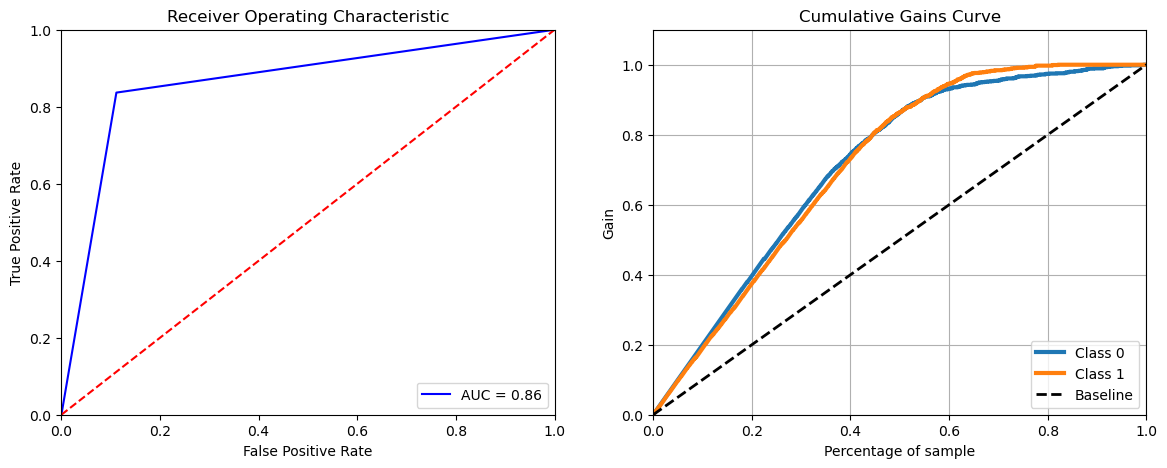

In [33]:
# Calculating ROC 
fpr, tpr, threshold = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharex=False)
ax1.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Receiver Operating Characteristic')
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')
ax1.legend(loc = 'lower right')
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
 
skplt.metrics.plot_cumulative_gain(y_val,model.predict_proba(X_val), ax=ax2)
ax2.set_ylim([0, 1.1])

### Neural Networks

In [34]:
model = keras.Sequential([
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [35]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
model.fit(X_train,y_train,epochs=12,batch_size=32,verbose=1);

Epoch 1/12
509/509 [==============================] - 0s 410us/step - loss: 0.4160 - accuracy: 0.8133
Epoch 2/12
509/509 [==============================] - 0s 401us/step - loss: 0.3385 - accuracy: 0.8575
Epoch 3/12
509/509 [==============================] - 0s 401us/step - loss: 0.3137 - accuracy: 0.8659
Epoch 4/12
509/509 [==============================] - 0s 405us/step - loss: 0.2982 - accuracy: 0.8754
Epoch 5/12
509/509 [==============================] - 0s 405us/step - loss: 0.2891 - accuracy: 0.8780
Epoch 6/12
509/509 [==============================] - 0s 400us/step - loss: 0.2808 - accuracy: 0.8827
Epoch 7/12
509/509 [==============================] - 0s 401us/step - loss: 0.2728 - accuracy: 0.8881
Epoch 8/12
509/509 [==============================] - 0s 398us/step - loss: 0.2671 - accuracy: 0.8900
Epoch 9/12
509/509 [==============================] - 0s 402us/step - loss: 0.2626 - accuracy: 0.8933
Epoch 10/12
509/509 [==============================] - 0s 411us/step - loss: 0.254

In [37]:
y_pred = model.predict(X_val)
y_pred = np.round(y_pred).flatten()

NN_accuracy = accuracy_score(y_val,y_pred)
print(f'The Accuracy of the model using MultiLayer Perceptron is: {round(NN_accuracy,3)}')

72/72 [==============================] - 0s 302us/step
The Accuracy of the model using MultiLayer Perceptron is: 0.884


In [38]:
classification = classification_report(y_val,y_pred)
print(f'The Classification report of the model using MultiLayer Perceptron is:\n {classification}')

The Classification report of the model using MultiLayer Perceptron is:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      1148
           1       0.87      0.90      0.89      1145

    accuracy                           0.88      2293
   macro avg       0.88      0.88      0.88      2293
weighted avg       0.88      0.88      0.88      2293



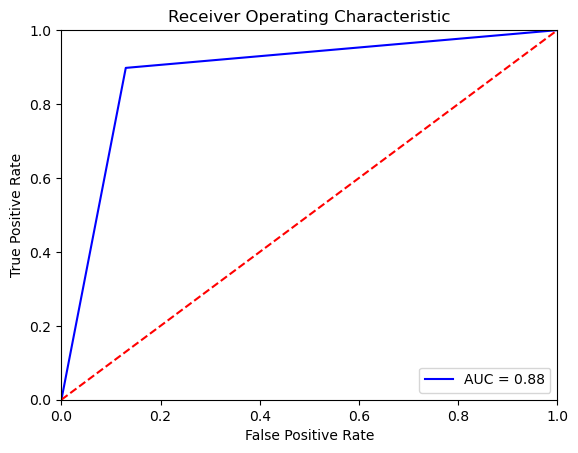

In [39]:
# Plotting ROC
fpr, tpr, threshold = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)
 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Models Accuracies

In [40]:
accuracies = {'Logistic Regression':Lr_accuracy,
              'K-Nearest Neighbor':Knn_accuracy,
              'Decision Tree':Dt_accuracy,
              'Support Vector Machine':SVC_accuracy,
              'Neural Networks':NN_accuracy}

model_accuracy = pd.DataFrame.from_dict(accuracies,orient='index')
model_accuracy.index.name = 'Model'
model_accuracy.rename(columns={model_accuracy.columns[0]:'Accuracy'})

,Accuracy
Model,
Logistic Regression,0.825120
K-Nearest Neighbor,0.918884
Decision Tree,0.899259
Support Vector Machine,0.862625
Neural Networks,0.883995


## K-Nearest Neighbors

#### Model testing on the test data using the model that achieved the highest accuracy during validation.

In [41]:
for k in range(1,5):
    print(f'Testing for {k} neighbour..')
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test,y_pred)
    print(f'The Accuracy for {k} neighbours is: {round(accuracy,2)}\n')

Testing for 1 neighbour..
The Accuracy for 1 neighbours is: 0.92

Testing for 2 neighbour..
The Accuracy for 2 neighbours is: 0.93

Testing for 3 neighbour..
The Accuracy for 3 neighbours is: 0.9

Testing for 4 neighbour..
The Accuracy for 4 neighbours is: 0.91



In [42]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [43]:
y_pred = model.predict(X_test)
Knn_accuracy = accuracy_score(y_test,y_pred)
print(f'The Accuracy of the model using K-Nearest Neighbor is: {round(Knn_accuracy,3)}')

The Accuracy of the model using K-Nearest Neighbor is: 0.93


In [44]:
classification = classification_report(y_test,y_pred)
print(f'The Classification report of the model using K-Nearest Neighbor is:\n {classification}')

The Classification report of the model using K-Nearest Neighbor is:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      1135
           1       0.91      0.96      0.93      1158

    accuracy                           0.93      2293
   macro avg       0.93      0.93      0.93      2293
weighted avg       0.93      0.93      0.93      2293

